In [3]:
%pylab inline

import SimpleITK as sitk
import numpy as np

#importo le librerie
#simpleITK è una versione + semplice di ITK che mi permette di avere una serie di tool per 
#l'image processing

Populating the interactive namespace from numpy and matplotlib


In [4]:
dicom_sample=sitk.ReadImage("IMG-0001.dcm")

#per leggere il formato dycom devo per forza usare questa sintassi. 
#non si tratta di una matrice. si genera un oggetto sitk che contiene un'informazione
#tra cui l'immagine stessa

In [5]:
dicom_sample.GetSpacing()

#questa funzione mi permette di vedere lo spacing, ossia le dimensioni
# reali di ogni pixel o voxel, come in questo caso, in millimetri

(1.26953, 1.26953, 1.0)

In [13]:
dicom_sample.GetDimension()
#3 perché anche se è una singola fetta è tridimensionale perchè la fetta è associata ad uno spessore

3

In [14]:
dicom_sample.GetDirection()
#coseni direttori degli assi, cioè data un'origine quali sono gli orientamenti degli assi

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

In [15]:
dicom_sample.GetOrigin()
#punto d'inizio del volume in riferimento agl assi, offset

(-323.609009, -328.651001, 112.5)

In [25]:
dicom_sample[256,256,0]
#Restituisce il valore di un pixel in determinate posizioni.

210

In [26]:
dicom_np=sitk.GetArrayFromImage(dicom_sample)

In [27]:
dicom_np.shape

(1, 512, 512)

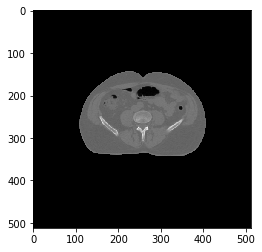

In [28]:
imshow(dicom_np[0,:,:], cmap="gray")

In [29]:
torace=sitk.ReadImage("chest.nrrd")

In [30]:
torace.GetSize()
#CI restituirà tre parametri, i primi due riguardano la dimensione 
#della matrice, l'ultimo il numero di fette nel file nrrd.

(512, 512, 136)

In [34]:
torace_np=sitk.GetArrayFromImage(torace)

In [35]:
torace_np.min(), torace_np.max()

(-1200, 3071)

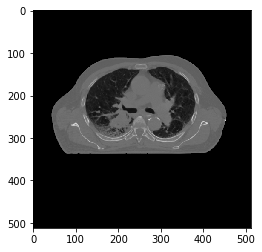

In [53]:
imshow(torace_np[80,:,:], cmap="gray")

#plottare la fetta 80

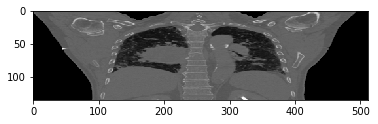

In [54]:
imshow(torace_np[::-1,256,:], cmap="gray")
#per vederlo in assiale dobbiamo prima definire un indice ben preciso
#con ::-1  prendiamo tutte le dimensiioni lungo quella direzione e 
# andiamo a ribaltare l'immagine

In [55]:
torace.GetSpacing()

(0.947266, 0.947266, 2.500000000000001)

In [58]:
pixel_ratio=torace.GetSpacing()[2]/torace.GetSpacing()[0]
#calcolo il rapporto tra le due dimensioni per ottenere il rapporto tra i pixel
#da usare per scalare l'immagine ed ottenere un'immagine più "allargata"

In [59]:
pixel_ratio

2.639174212945467

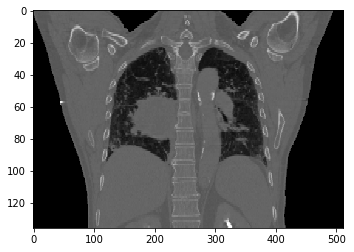

In [61]:
imshow(torace_np[::-1,256,:], aspect=pixel_ratio, cmap="gray")

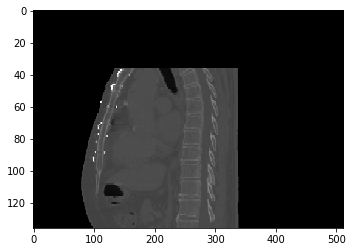

In [88]:
imshow(torace_np[::-1,:,256], aspect=pixel_ratio, cmap="gray")

In [91]:
torace_np[100:200,:,:]=-1200
#tutto quello che sta tra 100 e 200 assegna -1200, ossia assegna "aria"

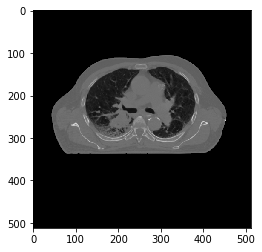

In [92]:
imshow(torace_np[80, :, :], cmap="gray")